# Thorat et al. 2022: Cluttered RNN Playground

Quick notebook to train/evaluate the Thorat-style recurrent CNN on the synthetic cluttered dataset (category-orthogonal variables).

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).resolve()
# If running from inside notebooks/, move up one level
if repo_root.name == 'notebooks':
    repo_root = repo_root.parent

src_path = repo_root / 'src'
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

print(f"Repo root: {repo_root}")
print(f"Added to sys.path: {src_path}")


Repo root: /Users/lorenzleisner/Desktop/CogSci/Master/WI_SE_25/hands-on-neuroai
Added to sys.path: /Users/lorenzleisner/Desktop/CogSci/Master/WI_SE_25/hands-on-neuroai/src


In [2]:
import torch
import matplotlib.pyplot as plt
from hands_on_neuroai.dataset_creation.clutter import (
    ClutteredDatasetConfig,
    build_cluttered_composite_dataset,
)
from hands_on_neuroai.training.clutter_rnn import (
    ClutterRCNNExperimentConfig,
    run_clutter_rcnn_experiment,
)


## Configure dataset & model

Tweak these to mirror the Thorat et al. setup or to try variants (additive interaction, different clutter, etc.).

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

clutter_cfg = ClutteredDatasetConfig(
    base_datasets=("mnist", "fashion_mnist"),
    root=str(repo_root / "data"),
    image_size=100,
    num_clutter_objects=7,
    block_grid=2,
    base_object_scale=0.44,
    seed=42,
    return_aux_labels=False,
)

exp_cfg = ClutterRCNNExperimentConfig(
    dataset_config=clutter_cfg,
    batch_size=64,
    epochs=5,
    lr=1e-3,
    eval_interval=1,
    timesteps=4,
    interaction="multiplicative",
    device=str(device),
)


Using device: cpu


## Quick visual sanity check

Dataset length: 60000; channels: 1


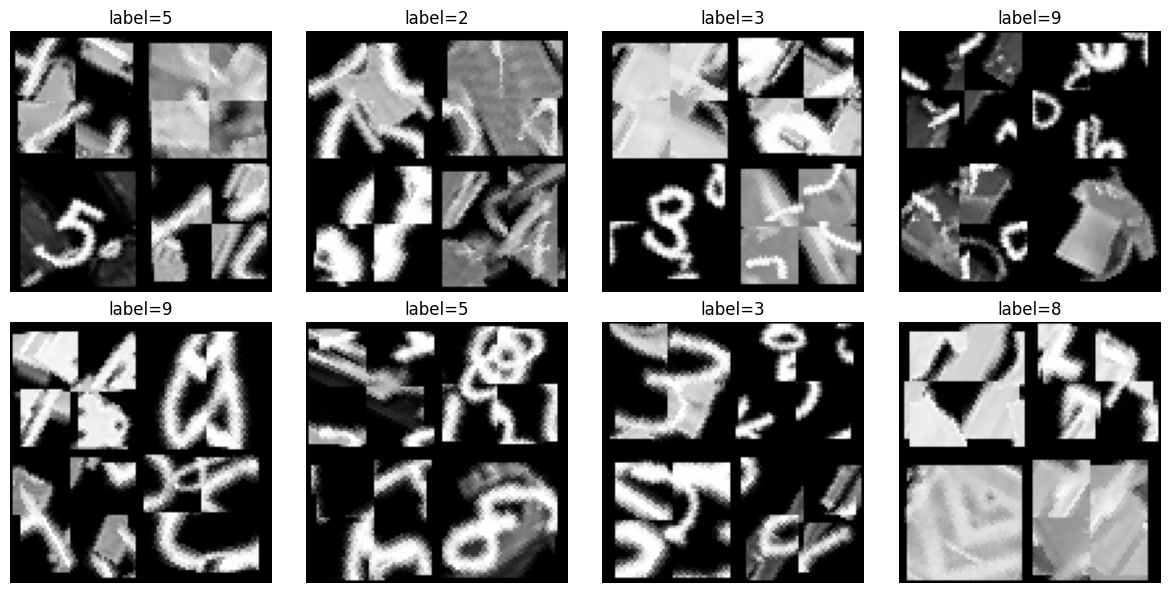

In [4]:
ds = build_cluttered_composite_dataset(clutter_cfg)
print(f"Dataset length: {len(ds)}; channels: {ds.out_channels}")

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flat
for ax, idx in zip(axes, range(8)):
    img, label = ds[idx]
    np_img = img.permute(1, 2, 0).cpu()
    cmap = "gray" if np_img.shape[2] == 1 else None
    ax.imshow(np_img.squeeze(), cmap=cmap)
    ax.set_title(f"label={label}")
    ax.axis("off")
plt.tight_layout()
plt.show()


## Train RCNN

Uses `run_clutter_rcnn_experiment`, which builds train/val splits, the RCNN, and runs a basic training loop.

In [5]:
epochs, accs = run_clutter_rcnn_experiment(
    cfg=exp_cfg,
    val_split=0.1,
    verbose=1,
)
print(list(zip(epochs, accs)))


Epoch 1:   0%|          | 0/844 [00:00<?, ?it/s]

libc++abi: libc++abi: terminating with uncaught exception of type std::__1::system_error: Broken pipe
terminating with uncaught exception of type std::__1::system_error: Broken pipe
libc++abi: terminating with uncaught exception of type std::__1::system_error: Broken pipe
libc++abi: terminating with uncaught exception of type std::__1::system_error: Broken pipe
libc++abi: terminating with uncaught exception of type std::__1::system_error: Broken pipe
libc++abi: terminating with uncaught exception of type std::__1::system_error: Broken pipe
libc++abi: terminating with uncaught exception of type std::__1::system_error: Broken pipe
libc++abi: terminating with uncaught exception of type std::__1::system_error: Broken pipe
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x1131ee340>
Traceback (most recent call last):
  File "/Users/lorenzleisner/opt/anaconda3/envs/anicog/lib/python3.11/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._s

KeyboardInterrupt: 

## Plot validation accuracy

In [ ]:
if epochs:
    plt.figure(figsize=(6,4))
    plt.plot(epochs, accs, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Val accuracy')
    plt.title('RCNN on cluttered dataset')
    plt.grid(True)
    plt.show()
